In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

# Loading the dataset from my drive
url = r"/content/drive/MyDrive/AAA_Empirical_Analysis/train_data.csv"

#Storing dataset in a datafram and displaying it
df = pd.read_csv(url)
df.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
campaign_id,1888.0,944.500000,545.162973,1.0,472.750000,944.500000,1416.250000,1888.000000
sender,1888.0,4.395657,3.277927,0.0,3.000000,3.000000,3.000000,15.000000
subject_len,1888.0,86.246292,30.143206,9.0,69.000000,83.000000,98.000000,265.000000
body_len,1888.0,14185.780191,7327.615307,23.0,9554.500000,12689.000000,17351.500000,44491.000000
mean_paragraph_len,1888.0,35.239407,28.139498,4.0,21.000000,29.000000,40.000000,286.000000
day_of_week,1888.0,2.828390,1.763193,0.0,1.000000,3.000000,4.000000,6.000000
is_weekend,1888.0,0.199682,0.399867,0.0,0.000000,0.000000,0.000000,1.000000
category,1888.0,9.949682,5.300719,0.0,6.000000,10.000000,15.000000,15.000000
product,1888.0,17.525424,12.369526,0.0,9.000000,12.000000,27.250000,43.000000
no_of_CTA,1888.0,4.222458,4.628348,0.0,2.000000,3.000000,5.000000,49.000000


<ipython-input-34-521e89cdd9f1>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = correlation_data.corr()


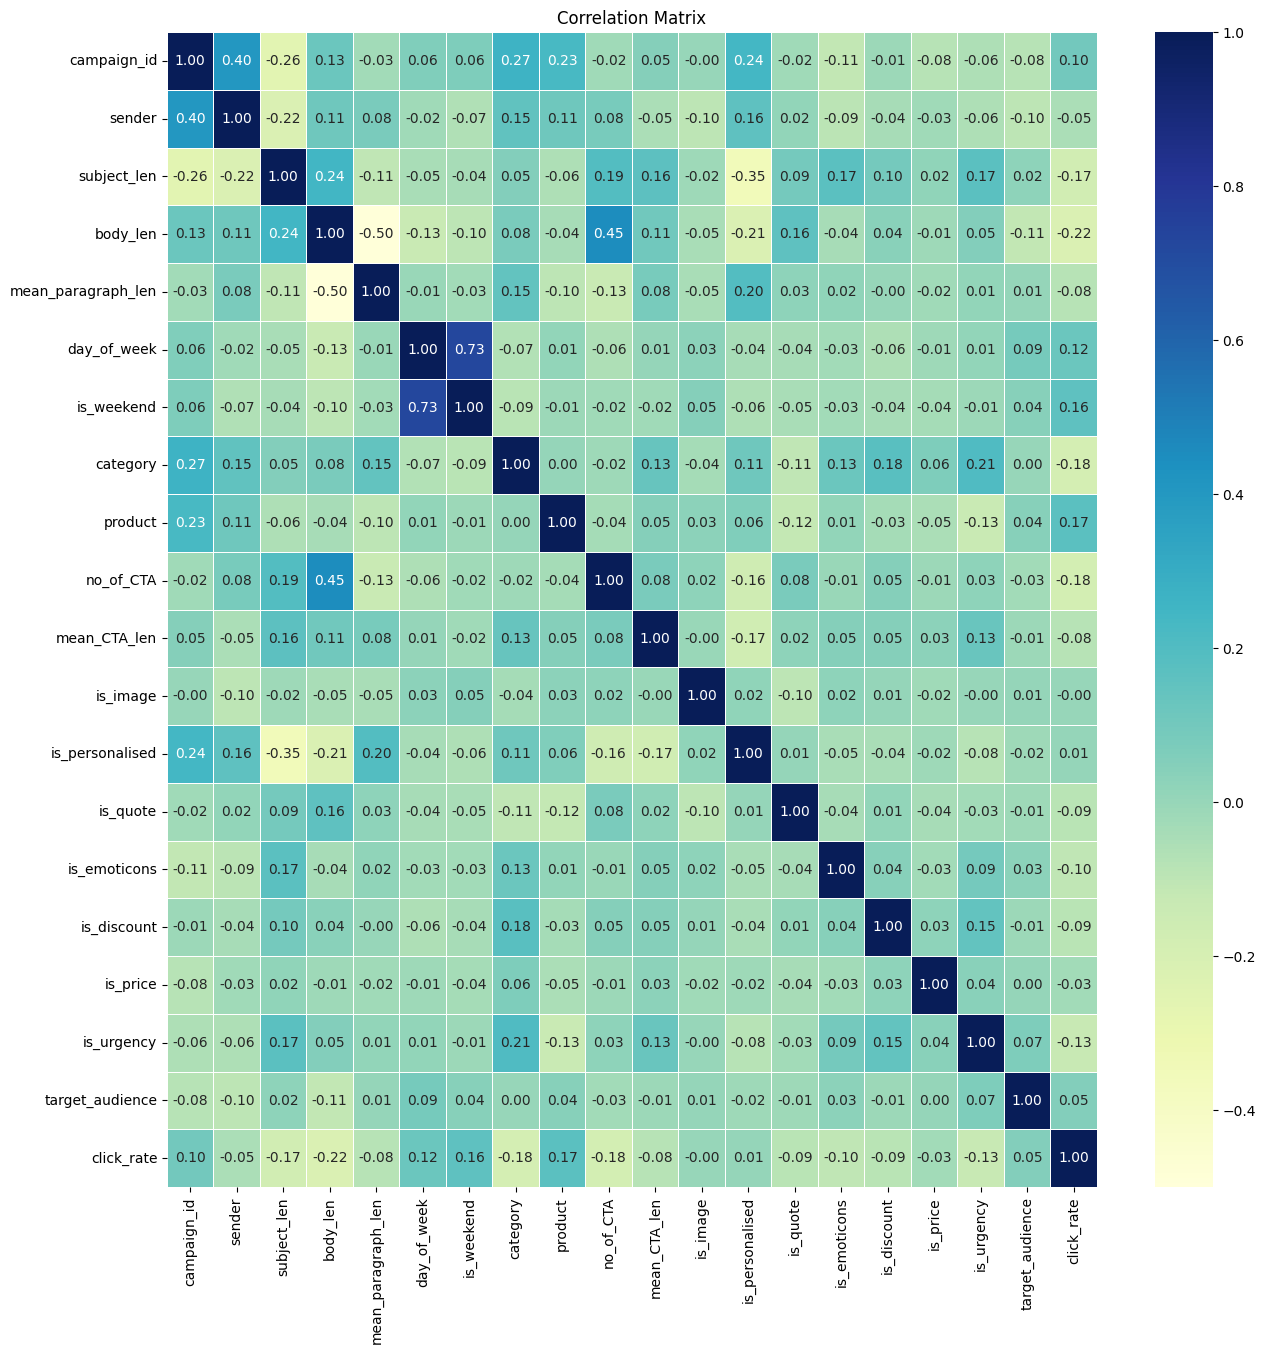

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting relevant columns for correlation analysis
correlation_data = df.drop('is_timer', axis=1)

# Computing correlation matrix
correlation_matrix = correlation_data.corr()
plt.figure(figsize=(15, 15))

# Plotting correlation matrix using heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


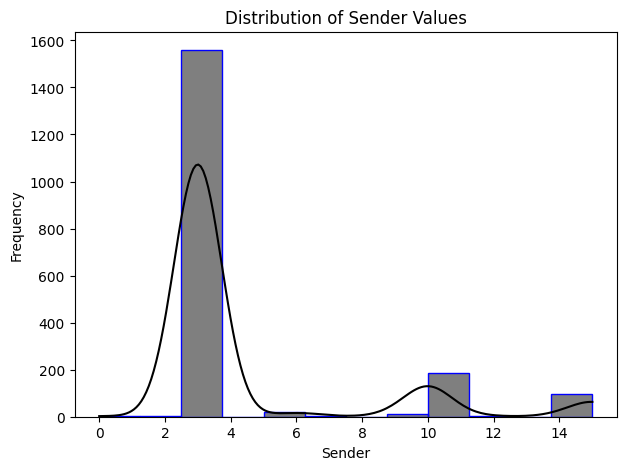

In [72]:
#Histogram of sender data
plt.figure(figsize=(7, 5))
sns.histplot(x='sender', data=df, bins='auto', kde=True, color='black', edgecolor='blue')

plt.xlabel('Sender')
plt.ylabel('Frequency')
plt.title('Distribution of Sender Values')
plt.show()

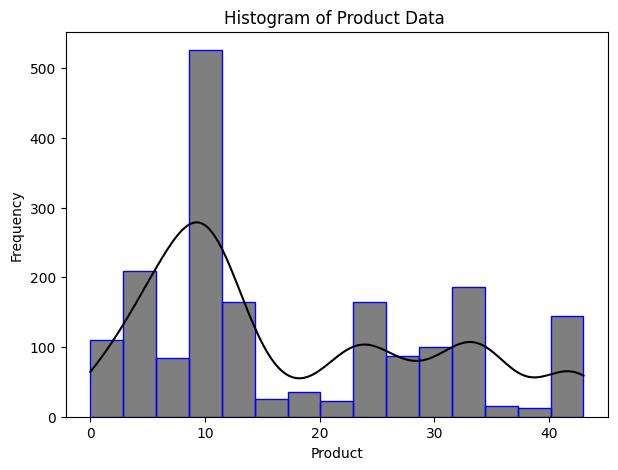

In [73]:
#histogram of product data
plt.figure(figsize=(7, 5))
sns.histplot(data=df, x='product', bins='auto', kde=True, color='black', edgecolor='blue')
plt.xlabel('Product')
plt.ylabel('Frequency')
plt.title('Histogram of Product Data ')
plt.show()

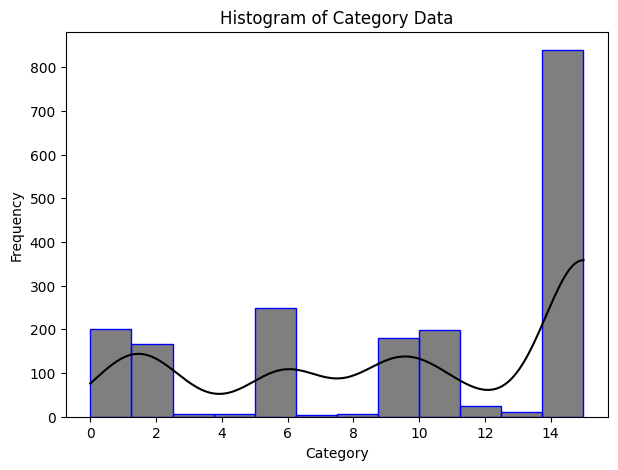

In [74]:
#Histogram of category data
plt.figure(figsize=(7, 5))
sns.histplot(data=df, x='category', bins='auto', kde=True, color='black', edgecolor='blue')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Histogram of Category Data')
plt.show()

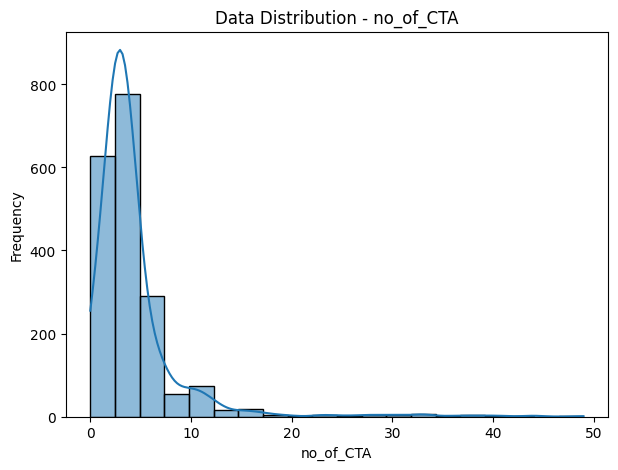

In [75]:
# Plotting a histogram to understand the distribution of subject lenth data
feature = 'no_of_CTA'
plt.figure(figsize=(7, 5))
sns.histplot(df[feature], bins=20, kde=True)
plt.title(f'Data Distribution - {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.show()

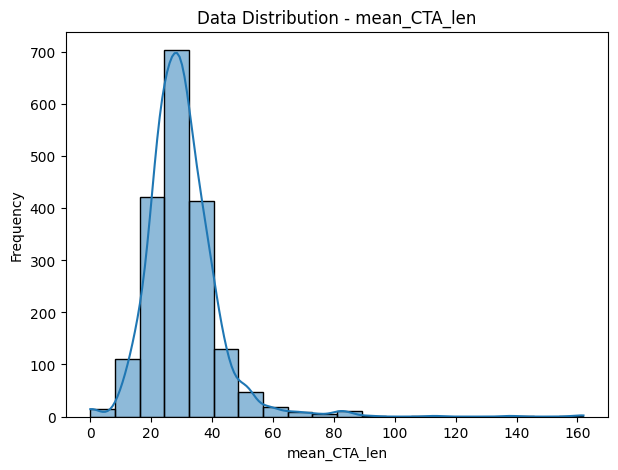

In [76]:
# Plotting a histogram to understand the distribution of subject lenth data
feature = 'mean_CTA_len'
plt.figure(figsize=(7, 5))
sns.histplot(df[feature], bins=20, kde=True)
plt.title(f'Data Distribution - {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.show()

Total Count: 1888 counts



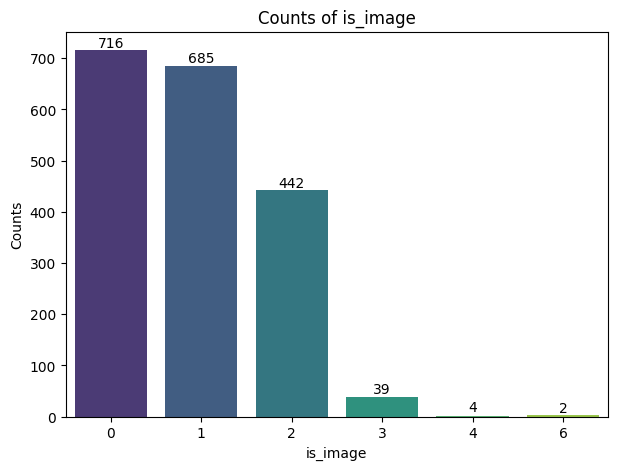

In [77]:
#is_image count and representation in bar plot

# Count values
value_counts = df['is_image'].value_counts()

# Display total count
total_count = len(df['is_image'])
print(f'Total Count: {total_count} counts\n')

plt.figure(figsize=(7, 5))
barplot = sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')

# Displaying value counts on bars
for i, count in enumerate(value_counts.values):
    barplot.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.title('Counts of is_image')
plt.xlabel('is_image')
plt.ylabel('Counts')
plt.show()

is_personalised 0: 1781 counts
is_personalised 1: 107 counts
Total Count: 1888 counts



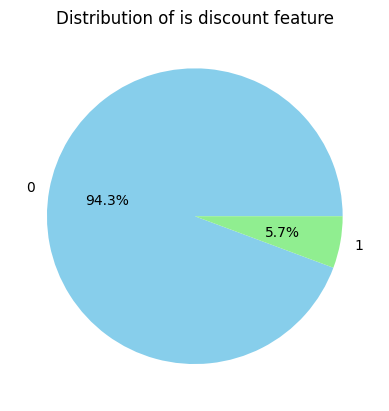

In [78]:
#is_personalised count and representation as piechart

# Count values
value_counts = df['is_personalised'].value_counts()

# Display counts
for index, count in value_counts.items():
    print(f'is_personalised {index}: {count} counts')

# Display total count
total_count = len(df['is_personalised'])
print(f'Total Count: {total_count} counts\n')

# Pie chart
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Distribution of is discount feature')
plt.show()

Total Count: 1888 counts



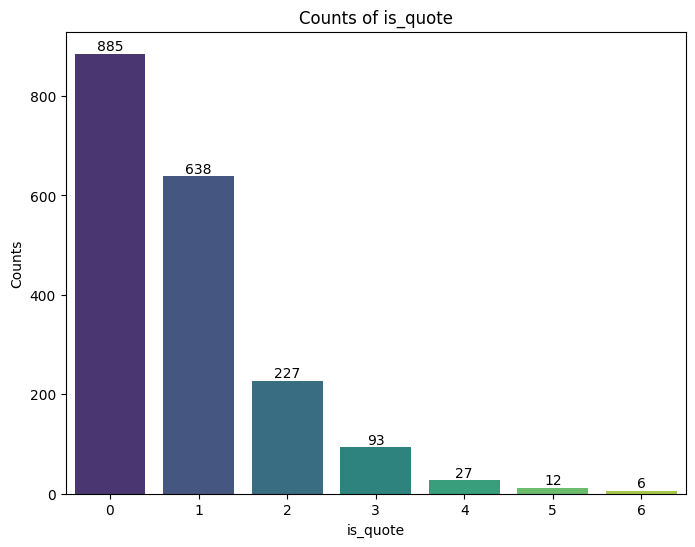

In [79]:
#is_quote count and representation in bar plot

# Count values
value_counts = df['is_quote'].value_counts()

# Display total count
total_count = len(df['is_quote'])
print(f'Total Count: {total_count} counts\n')

plt.figure(figsize=(8, 6))
barplot = sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')

# Displaying value counts on bars
for i, count in enumerate(value_counts.values):
    barplot.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.title('Counts of is_quote')
plt.xlabel('is_quote')
plt.ylabel('Counts')
plt.show()

Total Count: 1888 counts



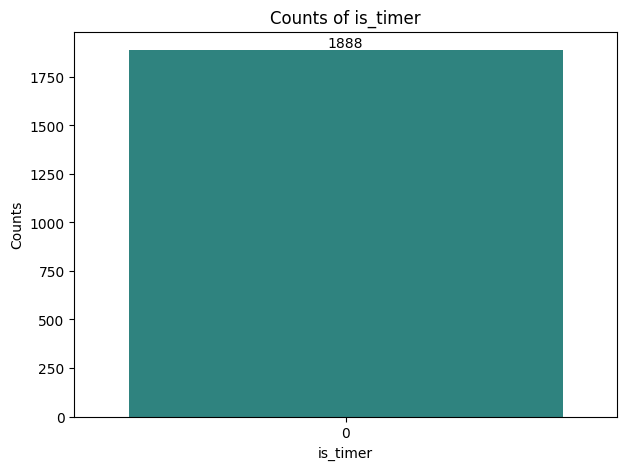

In [80]:
#is_timer count and representation in bar plot

# Count values
value_counts = df['is_timer'].value_counts()

# Display total count
total_count = len(df['is_timer'])
print(f'Total Count: {total_count} counts\n')

plt.figure(figsize=(7, 5))
barplot = sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')

# Displaying value counts on bars
for i, count in enumerate(value_counts.values):
    barplot.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.title('Counts of is_timer')
plt.xlabel('is_timer')
plt.ylabel('Counts')
plt.show()

Total Count: 1888 counts



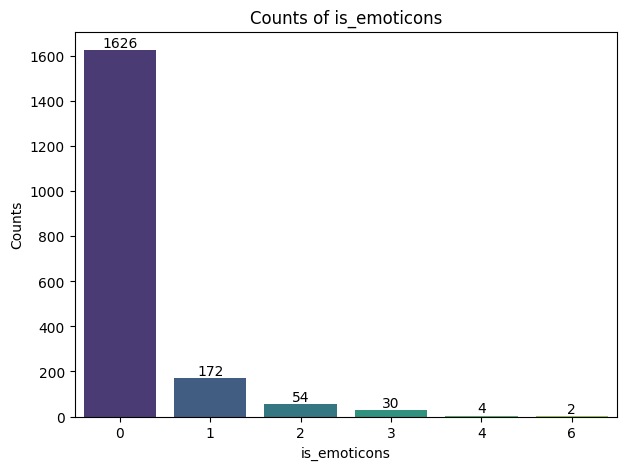

In [81]:
#Is_emoticons count and representation in bar plot

# Count values
value_counts = df['is_emoticons'].value_counts()

# Display total count
total_count = len(df['is_emoticons'])
print(f'Total Count: {total_count} counts\n')

plt.figure(figsize=(7, 5))
barplot = sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')

# Displaying value counts on bars
for i, count in enumerate(value_counts.values):
    barplot.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.title('Counts of is_emoticons')
plt.xlabel('is_emoticons')
plt.ylabel('Counts')
plt.show()

is_discount 0: 1813 counts
is_discount 1: 75 counts
Total Count: 1888 counts



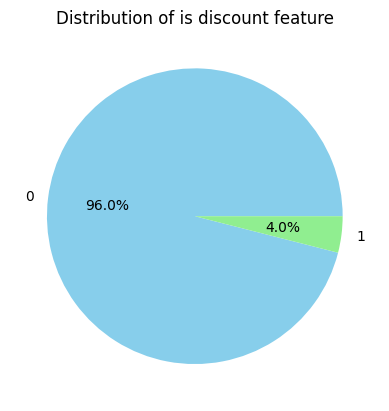

In [82]:
#Is_discount count and representation as piechart

# Count values
value_counts = df['is_discount'].value_counts()

# Display counts
for index, count in value_counts.items():
    print(f'is_discount {index}: {count} counts')

# Display total count
total_count = len(df['is_discount'])
print(f'Total Count: {total_count} counts\n')

# Pie chart
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Distribution of is discount feature')
plt.show()

Total Count: 1888 counts



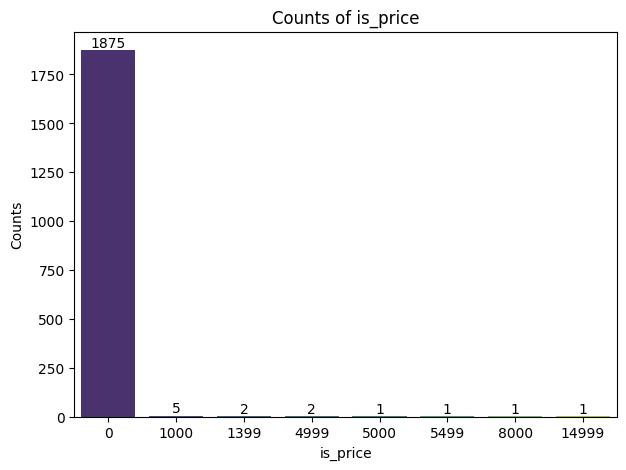

In [83]:
#is_price count and representation in bar plot

# Count values for is_price
value_counts_is_price = df['is_price'].value_counts()

# Display total count
total_count = len(df['is_price'])
print(f'Total Count: {total_count} counts\n')

plt.figure(figsize=(7, 5))
barplot = sns.barplot(x=value_counts_is_price.index, y=value_counts_is_price.values, palette='viridis')

# Displaying value counts on bars
for i, count in enumerate(value_counts_is_price.values):
    barplot.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.title('Counts of is_price')
plt.xlabel('is_price')
plt.ylabel('Counts')
plt.show()

is_urgency 0: 1676 counts
is_urgency 1: 212 counts
Total Count: 1888 counts



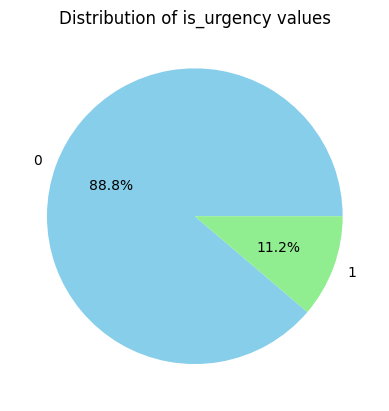

In [84]:
#Is_urgency count and representation as piechart

# Count values
value_counts = df['is_urgency'].value_counts()

# Display counts
for index, count in value_counts.items():
    print(f'is_urgency {index}: {count} counts')

# Display total count
total_count = len(df['is_urgency'])
print(f'Total Count: {total_count} counts\n')

# Pie chart
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Distribution of is_urgency values')
plt.show()

Total Count: 1888 counts



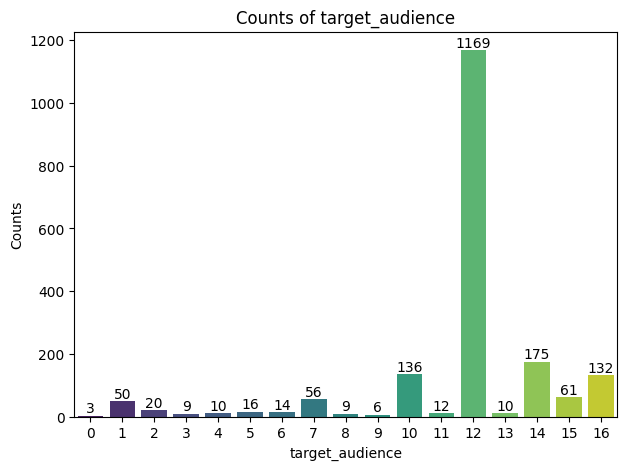

In [85]:
#target_audience count and representation as Histogram

# Count values for target_audience
value_counts_target_audience = df['target_audience'].value_counts().sort_index()

# Display total count
total_count = len(df['target_audience'])
print(f'Total Count: {total_count} counts\n')

plt.figure(figsize=(7, 5))
barplot = sns.barplot(x=value_counts_target_audience.index, y=value_counts_target_audience.values, palette='viridis')

# Displaying value counts on bars
for i, count in enumerate(value_counts_target_audience.values):
    barplot.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.title('Counts of target_audience')
plt.xlabel('target_audience')
plt.ylabel('Counts')
plt.show()

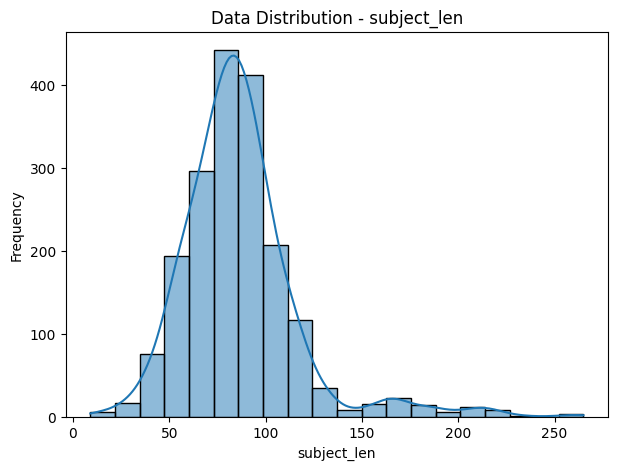

In [86]:
numerical_features = ['subject_len', 'body_len', 'mean_paragraph_len']
# Plotting a histogram to understand the distribution of subject lenth data
feature = 'subject_len'
plt.figure(figsize=(7, 5))
sns.histplot(df[feature], bins=20, kde=True)
plt.title(f'Data Distribution - {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.show()

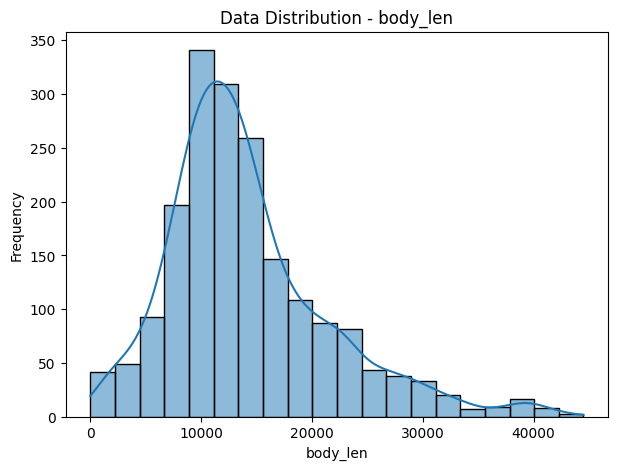

In [87]:
# Plotting a histogram to understand the distribution of length of the email body
feature = 'body_len'
plt.figure(figsize=(7, 5))
sns.histplot(df[feature], bins=20, kde=True)
plt.title(f'Data Distribution - {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.show()

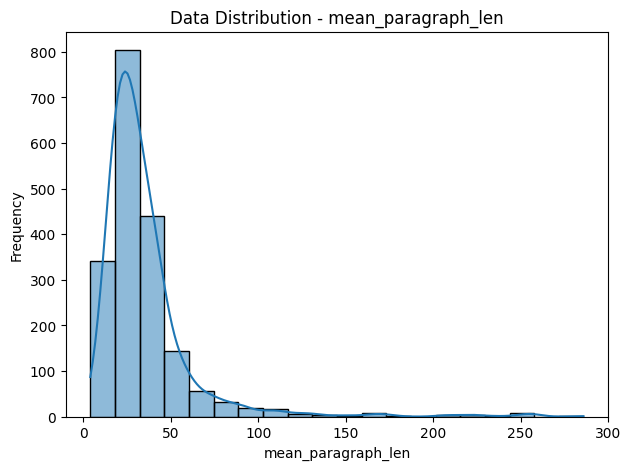

In [88]:
# Plotting a histogram to understand the distribution of mean paragraph length
feature = 'mean_paragraph_len'
plt.figure(figsize=(7, 5))
sns.histplot(df[feature], bins=20, kde=True)
plt.title(f'Data Distribution - {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.show()

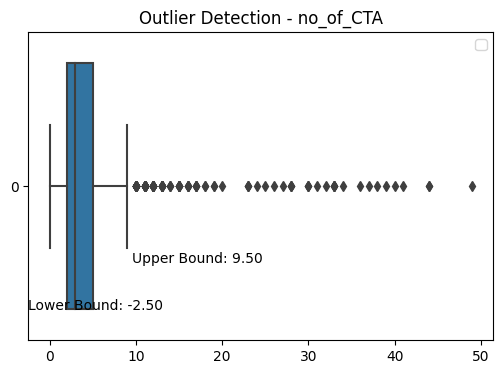

In [89]:
# Plotting a box plot to observe the outliers in no_of_CTA feature
# Calculating the upper and lower bounds
Q1 = df['no_of_CTA'].quantile(0.25)
Q3 = df['no_of_CTA'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

plt.figure(figsize=(6, 4))
sns.boxplot(data=df['no_of_CTA'], orient="h")
plt.title('Outlier Detection - no_of_CTA')

# Add lines for upper and lower bounds
plt.text(lower_bound, 0.4, f'Lower Bound: {lower_bound:.2f}', color='black', fontsize=10)
plt.text(upper_bound, 0.25, f'Upper Bound: {upper_bound:.2f}', color='black', fontsize=10)

plt.legend()
plt.show()

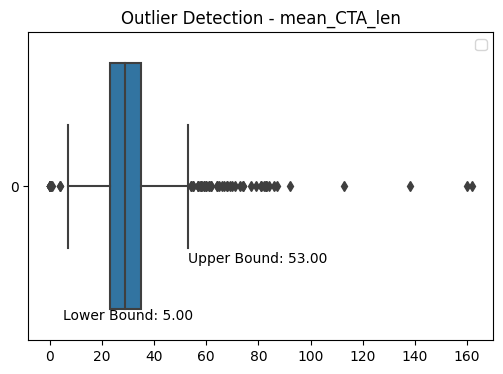

In [90]:
# Plotting a box plot to observe the outliers in mean_CTA_len feature
# Calculating the upper and lower bounds
Q1 = df['mean_CTA_len'].quantile(0.25)
Q3 = df['mean_CTA_len'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

plt.figure(figsize=(6, 4))
sns.boxplot(data=df['mean_CTA_len'], orient="h")
plt.title('Outlier Detection - mean_CTA_len')

# Add lines for upper and lower bounds
plt.text(lower_bound, 0.435, f'Lower Bound: {lower_bound:.2f}', color='black', fontsize=10)
plt.text(upper_bound, 0.25, f'Upper Bound: {upper_bound:.2f}', color='black', fontsize=10)

plt.legend()
plt.show()

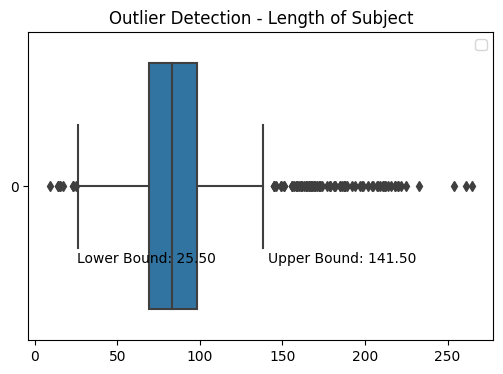

In [91]:
# Plotting a box plot to observe the outliers in subject_len feature
# Calculating the upper and lower bounds
Q1 = df['subject_len'].quantile(0.25)
Q3 = df['subject_len'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

plt.figure(figsize=(6, 4))
sns.boxplot(data=df['subject_len'], orient="h")
plt.title('Outlier Detection - Length of Subject')

# Add lines for upper and lower bounds
plt.text(lower_bound, 0.25, f'Lower Bound: {lower_bound:.2f}', color='black', fontsize=10)
plt.text(upper_bound, 0.25, f'Upper Bound: {upper_bound:.2f}', color='black', fontsize=10)

plt.legend()
plt.show()

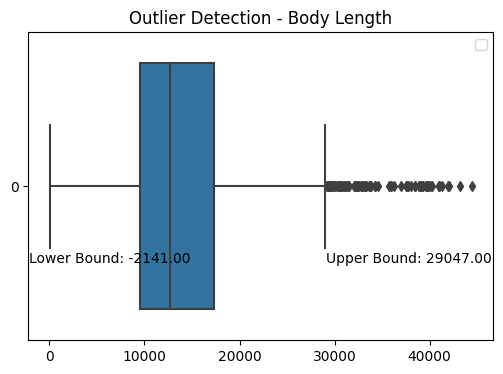

In [92]:
# Plotting a box plot to observe the outliers in body_len feature
# Calculating the upper and lower bounds
Q1 = df['body_len'].quantile(0.25)
Q3 = df['body_len'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

plt.figure(figsize=(6, 4))
sns.boxplot(data=df['body_len'], orient="h")
plt.title('Outlier Detection - Body Length')

# Add lines for upper and lower bounds
plt.text(lower_bound, 0.25, f'Lower Bound: {lower_bound:.2f}', color='black', fontsize=10)
plt.text(upper_bound, 0.25, f'Upper Bound: {upper_bound:.2f}', color='black', fontsize=10)

plt.legend()
plt.show()

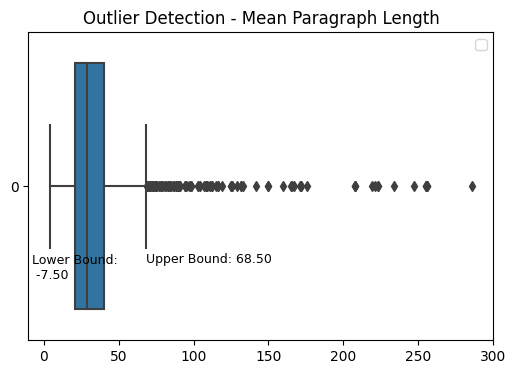

In [93]:
# Plotting a box plot to observe the outliers in mean_paragraph_len feature

# Calculating the upper and lower bounds
Q1 = df['mean_paragraph_len'].quantile(0.25)
Q3 = df['mean_paragraph_len'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

plt.figure(figsize=(6, 4))
sns.boxplot(data=df['mean_paragraph_len'], orient="h")
plt.title('Outlier Detection - Mean Paragraph Length')

# Add lines for upper and lower bounds
plt.text(lower_bound, 0.3, f'Lower Bound:\n {lower_bound:.2f}', color='black', fontsize=9)
plt.text(upper_bound, 0.25, f'Upper Bound: {upper_bound:.2f}', color='black', fontsize=9)

plt.legend()
plt.show()

<ipython-input-94-bf60f3b49a39>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='sender', y='click_rate', data=df, ci=None)


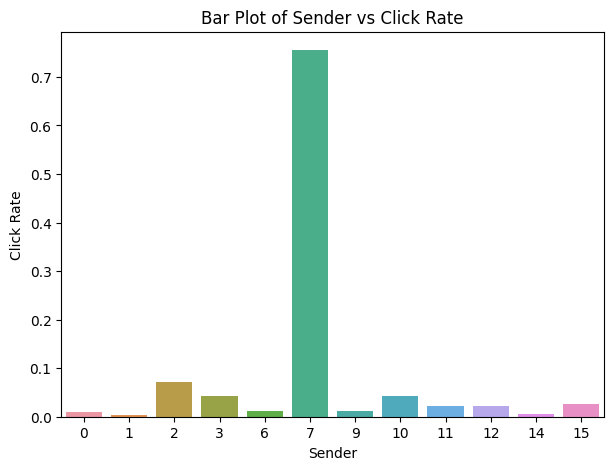

In [94]:
# Create a bar plot
plt.figure(figsize=(7, 5))
# Bar plot
sns.barplot(x='sender', y='click_rate', data=df, ci=None)
plt.title('Bar Plot of Sender vs Click Rate')
plt.xlabel('Sender')
plt.ylabel('Click Rate')
plt.show()

<ipython-input-95-1987528f6635>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='product', y='click_rate', data=df, ci=None)


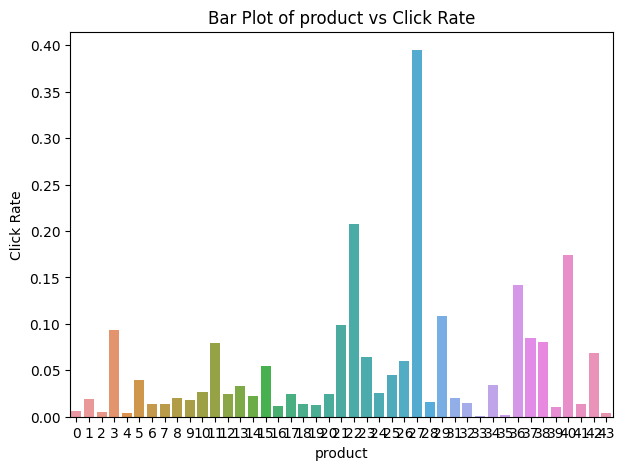

In [95]:
# Create a bar plot
plt.figure(figsize=(7, 5))
# Bar plot
sns.barplot(x='product', y='click_rate', data=df, ci=None)
plt.title('Bar Plot of Product vs Click Rate')
plt.xlabel('Product')
plt.ylabel('Click Rate')
plt.show()

<ipython-input-96-bdbfd0cf8ef0>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='category', y='click_rate', data=df, ci=None)


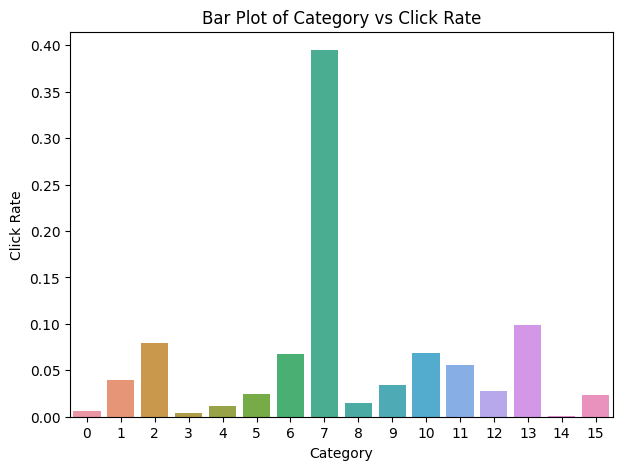

In [96]:
# Create a bar plot
plt.figure(figsize=(7, 5))
# Bar plot
sns.barplot(x='category', y='click_rate', data=df, ci=None)
plt.title('Bar Plot of Category vs Click Rate')
plt.xlabel('Category')
plt.ylabel('Click Rate')
plt.show()

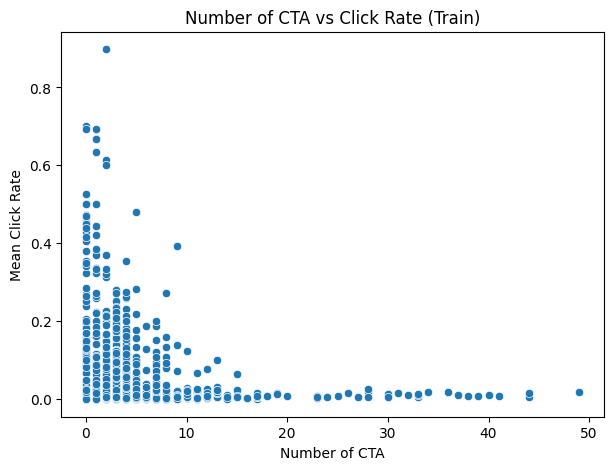

In [97]:
# Scatter plot for 'no_of_CTA' vs 'click_rate'
plt.figure(figsize=(7, 5))
sns.scatterplot(x='no_of_CTA', y='click_rate', data=df)
plt.title('Number of CTA vs Click Rate (Train)')
plt.xlabel('Number of CTA')
plt.ylabel('Mean Click Rate')
plt.show()

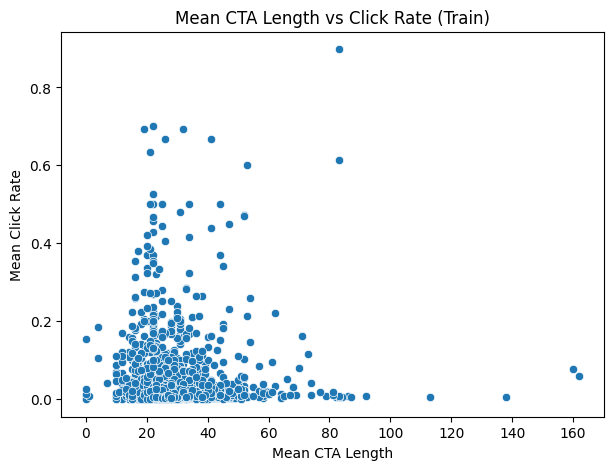

In [98]:
# Scatter plot for 'mean_CTA_len' vs 'click_rate'
plt.figure(figsize=(7, 5))
sns.scatterplot(x='mean_CTA_len', y='click_rate', data=df)
plt.title('Mean CTA Length vs Click Rate (Train)')
plt.xlabel('Mean CTA Length')
plt.ylabel('Mean Click Rate')
plt.show()

<ipython-input-99-869abce968e4>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='is_image', y='click_rate', data=df, ci=None)


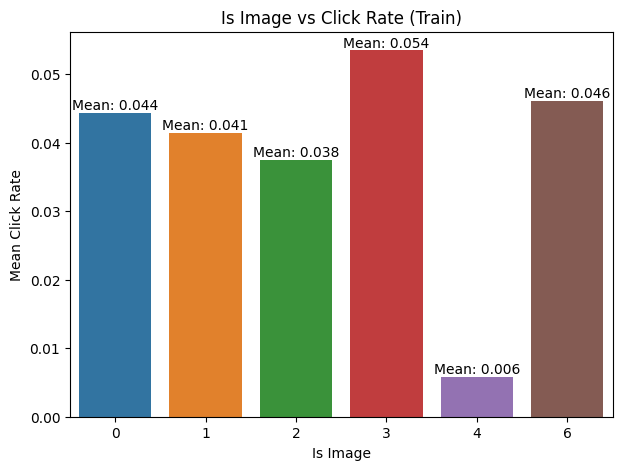

In [99]:
# Bar plot for 'is_image' vs 'click_rate'
plt.figure(figsize=(7, 5))
sns.barplot(x='is_image', y='click_rate', data=df, ci=None)
mean_click_rate_image = df.groupby('is_image')['click_rate'].mean()
for i, mean_rate in enumerate(mean_click_rate_image):
    plt.text(i, mean_rate, f'Mean: {mean_rate:.3f}', ha='center', va='bottom')
plt.title('Is Image vs Click Rate (Train)')
plt.xlabel('Is Image')
plt.ylabel('Mean Click Rate')
plt.show()

<ipython-input-100-d950cc7af975>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='is_personalised', y='click_rate', data=df, ci=None)


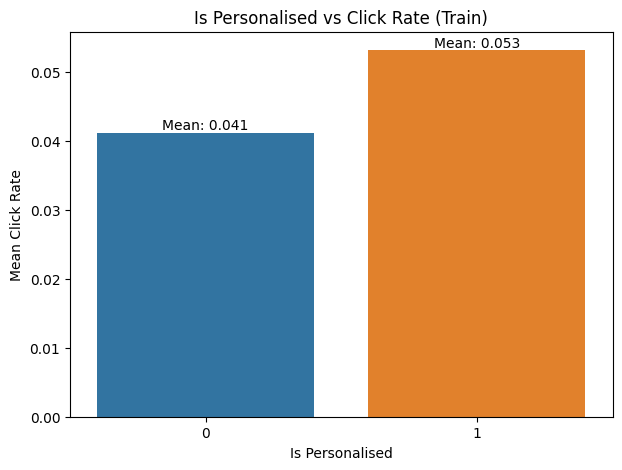

In [100]:
# Bar plot for 'is_personalised' vs 'click_rate'
plt.figure(figsize=(7, 5))
sns.barplot(x='is_personalised', y='click_rate', data=df, ci=None)
mean_click_rate_personalised = df.groupby('is_personalised')['click_rate'].mean()
for i, mean_rate in enumerate(mean_click_rate_personalised):
    plt.text(i, mean_rate, f'Mean: {mean_rate:.3f}', ha='center', va='bottom')
plt.title('Is Personalised vs Click Rate (Train)')
plt.xlabel('Is Personalised')
plt.ylabel('Mean Click Rate')
plt.show()

<ipython-input-101-898557361ed0>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='is_quote', y='click_rate', data=df, ci=None)


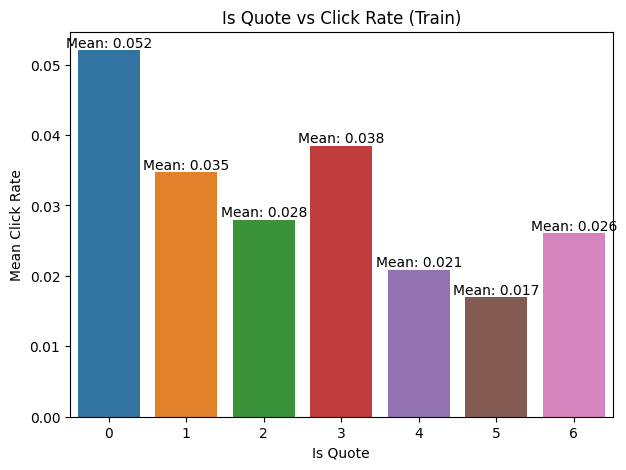

In [101]:
# Bar plot for 'is_quote' vs 'click_rate'
plt.figure(figsize=(7, 5))
sns.barplot(x='is_quote', y='click_rate', data=df, ci=None)
mean_click_rate_quote = df.groupby('is_quote')['click_rate'].mean()
for i, mean_rate in enumerate(mean_click_rate_quote):
    plt.text(i, mean_rate, f'Mean: {mean_rate:.3f}', ha='center', va='bottom')
plt.title('Is Quote vs Click Rate (Train)')
plt.xlabel('Is Quote')
plt.ylabel('Mean Click Rate')
plt.show()

<ipython-input-102-a94cc6a628da>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='is_timer', y='click_rate', data=df, ci=None)


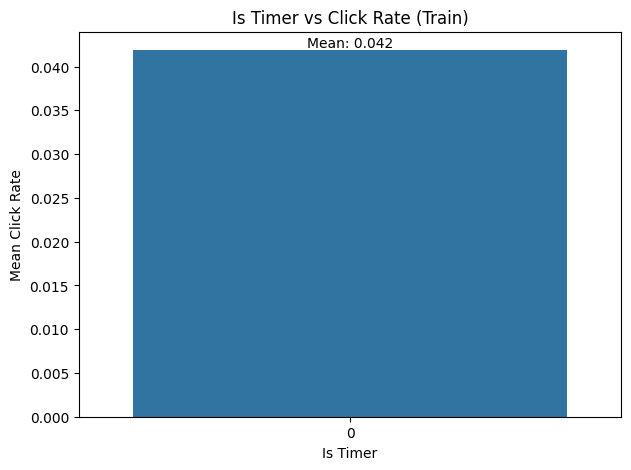

In [102]:
# Bar plot for 'is_timer' vs 'click_rate'
plt.figure(figsize=(7, 5))
sns.barplot(x='is_timer', y='click_rate', data=df, ci=None)
mean_click_rate_timer = df.groupby('is_timer')['click_rate'].mean()
for i, mean_rate in enumerate(mean_click_rate_timer):
    plt.text(i, mean_rate, f'Mean: {mean_rate:.3f}', ha='center', va='bottom')
plt.title('Is Timer vs Click Rate (Train)')
plt.xlabel('Is Timer')
plt.ylabel('Mean Click Rate')
plt.show()

Distribution of is_emoticons:
 0    0.861229
1    0.091102
2    0.028602
3    0.015890
4    0.002119
6    0.001059
Name: is_emoticons, dtype: float64
Mean Click Rate by is_emoticons:
 is_emoticons
0    0.045905
1    0.011607
2    0.037820
3    0.009313
4    0.022907
6    0.015958
Name: click_rate, dtype: float64


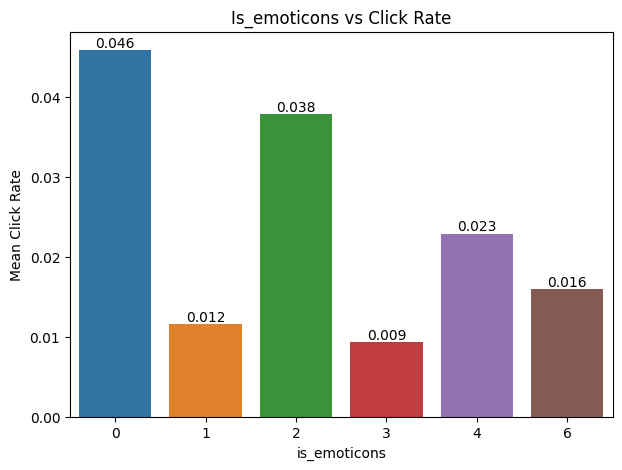

In [103]:
#Is_emoticons with respect to click_rate
# Observation
emoticons_distribution = df['is_emoticons'].value_counts(normalize=True)
print("Distribution of is_emoticons:\n", emoticons_distribution)

# Relation to click_rate
mean_click_rate_emoticons = df.groupby('is_emoticons')['click_rate'].mean()
print("Mean Click Rate by is_emoticons:\n", mean_click_rate_emoticons)

# Visualization
plt.figure(figsize=(7, 5))
sns.barplot(x='is_emoticons', y='click_rate', data=df, errorbar=None)
mean_click_rate_emoticons = df.groupby('is_emoticons')['click_rate'].mean()
for i, mean_rate in enumerate(mean_click_rate_emoticons):
    plt.text(i, mean_rate, f'{mean_rate:.3f}', ha='center', va='bottom')
plt.title('Is_emoticons vs Click Rate')
plt.xlabel('is_emoticons')
plt.ylabel('Mean Click Rate')
plt.show()

Distribution of is_discount:
 0    0.960275
1    0.039725
Name: is_discount, dtype: float64
Mean Click Rate by is_discount:
 is_discount
0    0.043362
1    0.006242
Name: click_rate, dtype: float64


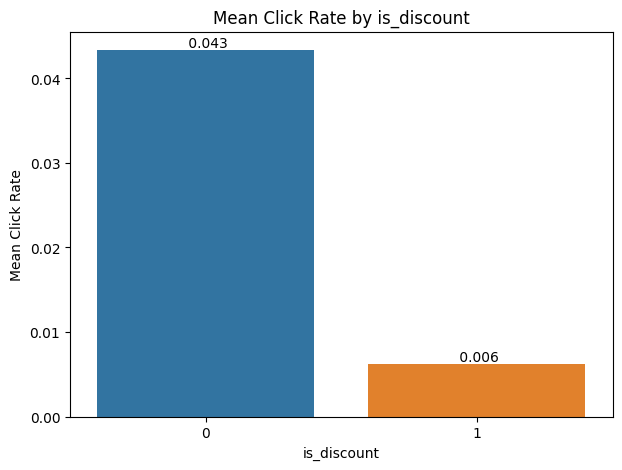

In [104]:
#Is_discount with respect to click_rate
# Observation
discount_distribution = df['is_discount'].value_counts(normalize=True)
print("Distribution of is_discount:\n", discount_distribution)

# Relation to click_rate
mean_click_rate_discount = df.groupby('is_discount')['click_rate'].mean()
print("Mean Click Rate by is_discount:\n", mean_click_rate_discount)

# Visualization
plt.figure(figsize=(7, 5))
sns.barplot(x='is_discount', y='click_rate', data=df, errorbar=None)
mean_click_rate_discount = df.groupby('is_discount')['click_rate'].mean()
for i, mean_rate in enumerate(mean_click_rate_discount):
    plt.text(i, mean_rate, f' {mean_rate:.3f}', ha='center', va='bottom')
plt.title('is_discount vs Click Rate')
plt.title('Mean Click Rate by is_discount')
plt.xlabel('is_discount')
plt.ylabel('Mean Click Rate')

plt.show()

Distribution of is_price:
 0        0.993114
5499     0.002648
8000     0.001059
5000     0.001059
4999     0.000530
1399     0.000530
1000     0.000530
14999    0.000530
Name: is_price, dtype: float64
Mean Click Rate by is_price:
 is_price
0        0.042109
1000     0.054237
1399     0.002767
4999     0.012607
5000     0.009735
5499     0.005973
8000     0.002936
14999    0.004036
Name: click_rate, dtype: float64


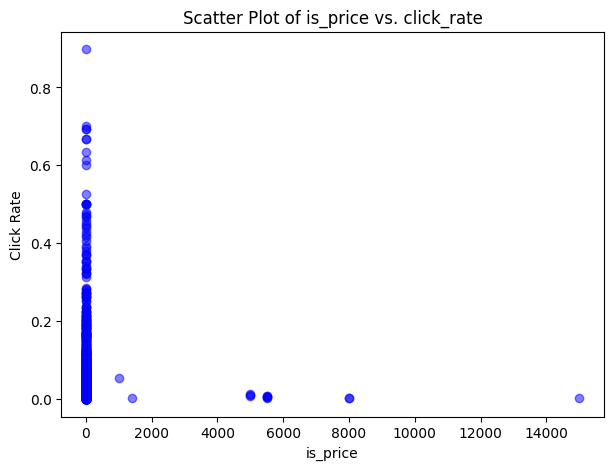

In [105]:
#Is_price with respect to click_rate
# Observation
price_distribution = df['is_price'].value_counts(normalize=True)
print("Distribution of is_price:\n", price_distribution)

# Relation to click_rate
mean_click_rate_price = df.groupby('is_price')['click_rate'].mean()
print("Mean Click Rate by is_price:\n", mean_click_rate_price)


# Scatter Plot
plt.figure(figsize=(7, 5))
plt.scatter(df['is_price'], df['click_rate'], color='blue', alpha=0.5)
plt.title('Scatter Plot of is_price vs. click_rate')
plt.xlabel('is_price')
plt.ylabel('Click Rate')
plt.show()

Distribution of is_urgency:
 0    0.887712
1    0.112288
Name: is_urgency, dtype: float64
Mean Click Rate by is_urgency:
 is_urgency
0    0.045310
1    0.014831
Name: click_rate, dtype: float64


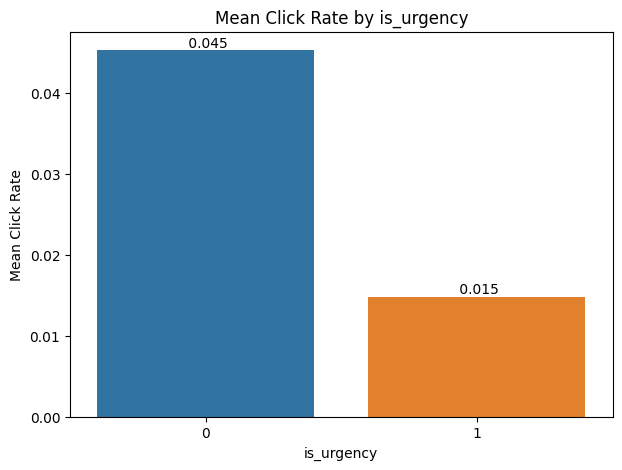

In [106]:
#Is_urgency with respect to click_rate
# Observation
urgency_distribution = df['is_urgency'].value_counts(normalize=True)
print("Distribution of is_urgency:\n", urgency_distribution)

# Relation to click_rate
mean_click_rate_urgency = df.groupby('is_urgency')['click_rate'].mean()
print("Mean Click Rate by is_urgency:\n", mean_click_rate_urgency)

# Visualization

plt.figure(figsize=(7, 5))
sns.barplot(x='is_urgency', y='click_rate', data=df, errorbar=None)
mean_click_rate_urgency = df.groupby('is_urgency')['click_rate'].mean()
for i, mean_rate in enumerate(mean_click_rate_urgency):
    plt.text(i, mean_rate, f' {mean_rate:.3f}', ha='center', va='bottom')
plt.title('is_urgency vs Click Rate')
plt.title('Mean Click Rate by is_urgency')
plt.xlabel('is_urgency')
plt.ylabel('Mean Click Rate')

plt.show()

Distribution of target_audience:
 12    0.619174
14    0.092691
10    0.072034
16    0.069915
15    0.032309
7     0.029661
1     0.026483
2     0.010593
5     0.008475
6     0.007415
11    0.006356
4     0.005297
13    0.005297
3     0.004767
8     0.004767
9     0.003178
0     0.001589
Name: target_audience, dtype: float64
Mean Click Rate by target_audience:
 target_audience
0     0.009245
1     0.024340
2     0.029384
3     0.044939
4     0.015234
5     0.013815
6     0.050748
7     0.022007
8     0.006852
9     0.006730
10    0.040149
11    0.004501
12    0.043971
13    0.019284
14    0.091743
15    0.005687
16    0.006947
Name: click_rate, dtype: float64


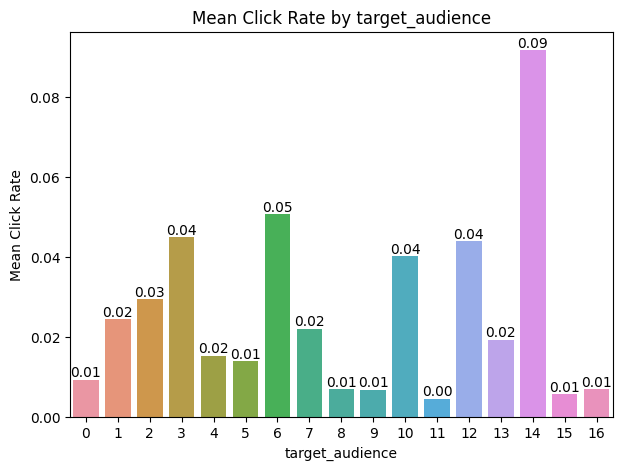

In [107]:
#target_audience with respect to click_rate
# Observation
audience_distribution = df['target_audience'].value_counts(normalize=True)
print("Distribution of target_audience:\n", audience_distribution)

# Relation to click_rate
mean_click_rate_audience = df.groupby('target_audience')['click_rate'].mean()
print("Mean Click Rate by target_audience:\n", mean_click_rate_audience)

# Visualization
plt.figure(figsize=(7, 5))
sns.barplot(x='target_audience', y='click_rate', data=df, errorbar=None)
mean_click_rate_audience = df.groupby('target_audience')['click_rate'].mean()
for i, mean_rate in enumerate(mean_click_rate_audience):
    plt.text(i, mean_rate, f'{mean_rate:.2f}', ha='center', va='bottom')
plt.title('target_audience vs Click Rate')
plt.title('Mean Click Rate by target_audience')
plt.xlabel('target_audience')
plt.ylabel('Mean Click Rate')

plt.show()

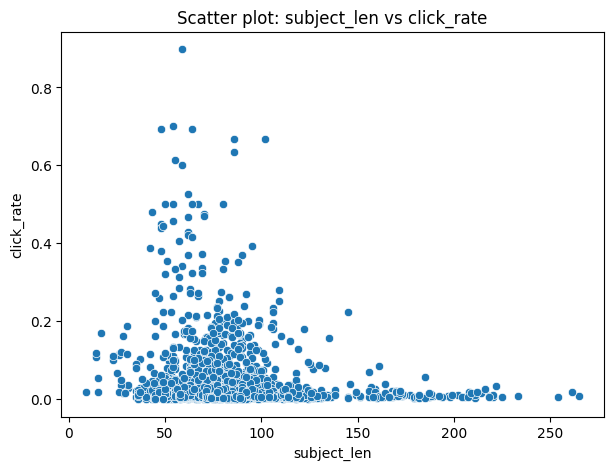

In [108]:
# A scatter plot to understand the relation between subject_len feature and target variable click_rate
plt.figure(figsize=(7, 5))
sns.scatterplot(x='subject_len', y='click_rate', data=df)
plt.title('Scatter plot: subject_len vs click_rate')
plt.xlabel('subject_len')
plt.ylabel('click_rate')
plt.show()

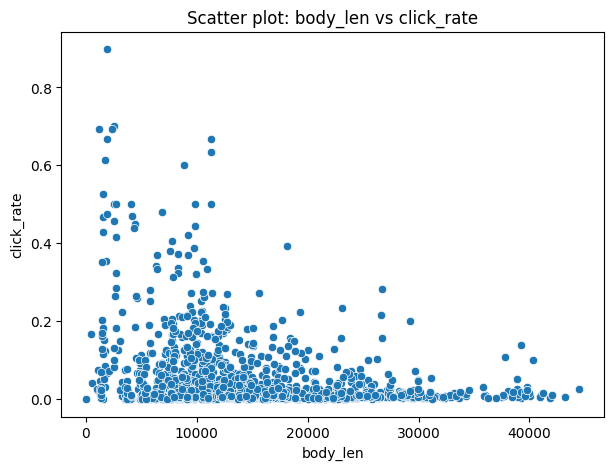

In [109]:
# A scatter plot to understand the relation between body_len feature and target variable click_rate

plt.figure(figsize=(7, 5))
sns.scatterplot(x='body_len', y='click_rate', data=df)
plt.title('Scatter plot: body_len vs click_rate')
plt.xlabel('body_len')
plt.ylabel('click_rate')
plt.show()

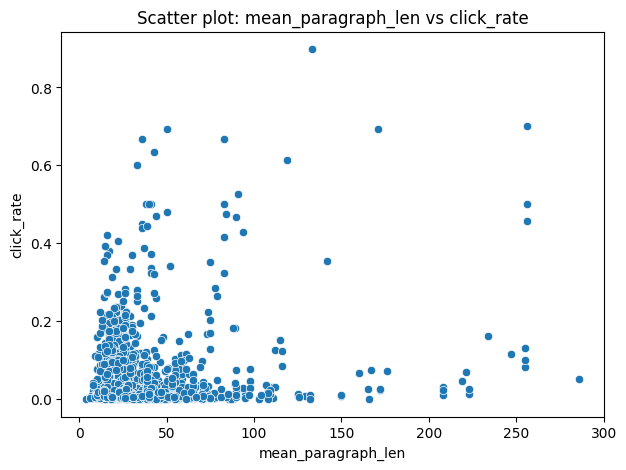

In [110]:
# A scatter plot to understand the relation between mean_paragraph_len feature and target variable click_rate

plt.figure(figsize=(7, 5))
sns.scatterplot(x='mean_paragraph_len', y='click_rate', data=df)
plt.title('Scatter plot: mean_paragraph_len vs click_rate')
plt.xlabel('mean_paragraph_len')
plt.ylabel('click_rate')
plt.show()

In [155]:
from scipy.stats import ttest_ind

target_variable = 'click_rate'
feature = 'sender'

# Finding the correlation coeff and p-value for the correlation between sender feature and target click_rate
t_statistic, p_value = ttest_ind(df[feature], df[target_variable])
correlation, _ = pearsonr(df[feature], df[target_variable])

print(f"T Statistic for {feature} and {target_variable}: {t_statistic}")
print(f"Correlation between {feature} and {target_variable}: {correlation}")
print(f"P-value: {p_value}\n")

T Statistic for sender and click_rate: 57.6930966328559
Correlation between sender and click_rate: -0.03139754532663776
P-value: 0.0



In [156]:
target_variable = 'click_rate'
feature = 'product'

# Finding the correlation coeff and p-value for the correlation between product feature and target click_rate
t_statistic, p_value = ttest_ind(df[feature], df[target_variable])
correlation, _ = pearsonr(df[feature], df[target_variable])

print(f"T Statistic for {feature} and {target_variable}: {t_statistic}")
print(f"Correlation between {feature} and {target_variable}: {correlation}")
print(f"P-value: {p_value}\n")

T Statistic for product and click_rate: 61.41396447050734
Correlation between product and click_rate: 0.12160227524547376
P-value: 0.0



In [157]:
target_variable = 'click_rate'
feature = 'category'

# Finding the correlation coeff and p-value for the correlation between category feature and target click_rate
t_statistic, p_value = ttest_ind(df[feature], df[target_variable])
correlation, _ = pearsonr(df[feature], df[target_variable])

print(f"T Statistic for {feature} and {target_variable}: {t_statistic}")
print(f"Correlation between {feature} and {target_variable}: {correlation}")
print(f"P-value: {p_value}\n")

T Statistic for category and click_rate: 81.20604616902446
Correlation between category and click_rate: -0.1677562090120046
P-value: 0.0



In [158]:
target_variable = 'click_rate'
feature = 'no_of_CTA'

# Finding the correlation coeff and p-value for the correlation between no_of_CTA feature and target click_rate
t_statistic, p_value = ttest_ind(df[feature], df[target_variable])
correlation, _ = pearsonr(df[feature], df[target_variable])

print(f"T Statistic for {feature} and {target_variable}: {t_statistic}")
print(f"Correlation between {feature} and {target_variable}: {correlation}")
print(f"P-value: {p_value}\n")

T Statistic for no_of_CTA and click_rate: 39.24086830319124
Correlation between no_of_CTA and click_rate: -0.17263684027135914
P-value: 9.134744523310117e-283



In [159]:
target_variable = 'click_rate'
feature = 'mean_CTA_len'

# Finding the correlation coeff and p-value for the correlation between mean_CTA_len feature and target click_rate
t_statistic, p_value = ttest_ind(df[feature], df[target_variable])
correlation, _ = pearsonr(df[feature], df[target_variable])

print(f"T Statistic for {feature} and {target_variable}: {t_statistic}")
print(f"Correlation between {feature} and {target_variable}: {correlation}")
print(f"P-value: {p_value}\n")

T Statistic for mean_CTA_len and click_rate: 110.71348748658511
Correlation between mean_CTA_len and click_rate: -0.031161971861755042
P-value: 0.0



In [160]:
target_variable = 'click_rate'
feature = 'is_image'

# Finding the correlation coeff and p-value for the correlation between is_image feature and target click_rate
t_statistic, p_value = ttest_ind(df[feature], df[target_variable])
correlation, _ = pearsonr(df[feature], df[target_variable])

print(f"T Statistic for {feature} and {target_variable}: {t_statistic}")
print(f"Correlation between {feature} and {target_variable}: {correlation}")
print(f"P-value: {p_value}\n")

T Statistic for is_image and click_rate: 43.327320574569356
Correlation between is_image and click_rate: -0.021527005413653107
P-value: 0.0



In [161]:
target_variable = 'click_rate'
feature = 'is_personalised'

# Finding the correlation coeff and p-value for the correlation between is_personalised feature and target click_rate
t_statistic, p_value = ttest_ind(df[feature], df[target_variable])
correlation, _ = pearsonr(df[feature], df[target_variable])

print(f"T Statistic for {feature} and {target_variable}: {t_statistic}")
print(f"Correlation between {feature} and {target_variable}: {correlation}")
print(f"P-value: {p_value}\n")

T Statistic for is_personalised and click_rate: 2.610230594587902
Correlation between is_personalised and click_rate: 0.032921776197264614
P-value: 0.009083886126673523



In [162]:
target_variable = 'click_rate'
feature = 'is_quote'

# Finding the correlation coeff and p-value for the correlation between is_quote feature and target click_rate
t_statistic, p_value = ttest_ind(df[feature], df[target_variable])
correlation, _ = pearsonr(df[feature], df[target_variable])

print(f"T Statistic for {feature} and {target_variable}: {t_statistic}")
print(f"Correlation between {feature} and {target_variable}: {correlation}")
print(f"P-value: {p_value}\n")

T Statistic for is_quote and click_rate: 33.18877917296929
Correlation between is_quote and click_rate: -0.09840186004996657
P-value: 3.715233804811014e-212



In [163]:
target_variable = 'click_rate'
feature = 'is_timer'

# Finding the correlation coeff and p-value for the correlation between is_timer feature and target click_rate
t_statistic, p_value = ttest_ind(df[feature], df[target_variable])
correlation, _ = pearsonr(df[feature], df[target_variable])

print(f"T Statistic for {feature} and {target_variable}: {t_statistic}")
print(f"Correlation between {feature} and {target_variable}: {correlation}")
print(f"P-value: {p_value}\n")

T Statistic for is_timer and click_rate: -21.61008854449971
Correlation between is_timer and click_rate: nan
P-value: 9.660453833609957e-98



In [164]:
target_variable = 'click_rate'
feature = 'is_emoticons'

# Finding the correlation coeff and p-value for the correlation between is_emoticons feature and target click_rate
t_statistic, p_value = ttest_ind(df[feature], df[target_variable])
correlation, _ = pearsonr(df[feature], df[target_variable])

print(f"T Statistic for {feature} and {target_variable}: {t_statistic}")
print(f"Correlation between {feature} and {target_variable}: {correlation}")
print(f"P-value: {p_value}\n")

T Statistic for is_emoticons and click_rate: 11.85350767297251
Correlation between is_emoticons and click_rate: -0.09430522829404966
P-value: 7.529884282975184e-32



In [165]:
target_variable = 'click_rate'
feature = 'is_discount'

# Finding the correlation coeff and p-value for the correlation between is_discount feature and target click_rate
t_statistic, p_value = ttest_ind(df[feature], df[target_variable])
correlation, _ = pearsonr(df[feature], df[target_variable])

print(f"T Statistic for {feature} and {target_variable}: {t_statistic}")
print(f"Correlation between {feature} and {target_variable}: {correlation}")
print(f"P-value: {p_value}\n")

T Statistic for is_discount and click_rate: -0.441770707602573
Correlation between is_discount and click_rate: -0.08610469841088633
P-value: 0.6586804482802313



In [166]:
target_variable = 'click_rate'
feature = 'is_price'

# Finding the correlation coeff and p-value for the correlation between is_price feature and target click_rate
t_statistic, p_value = ttest_ind(df[feature], df[target_variable])
correlation, _ = pearsonr(df[feature], df[target_variable])

print(f"T Statistic for {feature} and {target_variable}: {t_statistic}")
print(f"Correlation between {feature} and {target_variable}: {correlation}")
print(f"P-value: {p_value}\n")

T Statistic for is_price and click_rate: 3.1496752618933246
Correlation between is_price and click_rate: -0.030539707503137233
P-value: 0.0016472948869968689



In [167]:
target_variable = 'click_rate'
feature = 'is_urgency'

# Finding the correlation coeff and p-value for the correlation between is_urgency feature and target click_rate
t_statistic, p_value = ttest_ind(df[feature], df[target_variable])
correlation, _ = pearsonr(df[feature], df[target_variable])

print(f"T Statistic for {feature} and {target_variable}: {t_statistic}")
print(f"Correlation between {feature} and {target_variable}: {correlation}")
print(f"P-value: {p_value}\n")

T Statistic for is_urgency and click_rate: 9.35920746026809
Correlation between is_urgency and click_rate: -0.11428382324961081
P-value: 1.3404585624352308e-20



In [168]:
target_variable = 'click_rate'
feature = 'target_audience'

# Finding the correlation coeff and p-value for the correlation between target_audience feature and target click_rate
t_statistic, p_value = ttest_ind(df[feature], df[target_variable])
correlation, _ = pearsonr(df[feature], df[target_variable])

print(f"T Statistic for {feature} and {target_variable}: {t_statistic}")
print(f"Correlation between {feature} and {target_variable}: {correlation}")
print(f"P-value: {p_value}\n")

T Statistic for target_audience and click_rate: 170.73164168905603
Correlation between target_audience and click_rate: 0.03871266572890302
P-value: 0.0



In [169]:
target_variable = 'click_rate'
feature = 'subject_len'

# Finding the correlation coeff and p-value for the correlation between subject_len feature and target click_rate
t_statistic, p_value = ttest_ind(df[feature], df[target_variable])
correlation, _ = pearsonr(df[feature], df[target_variable])

print(f"T Statistic for {feature} and {target_variable}: {t_statistic}")
print(f"Correlation between {feature} and {target_variable}: {correlation}")
print(f"P-value: {p_value}\n")

T Statistic for subject_len and click_rate: 124.26227968845419
Correlation between subject_len and click_rate: -0.18014337944849376
P-value: 0.0



In [170]:
# Finding the correlation coeff and p-value for the correlation between body_len feature and target click_rate
feature = 'body_len'
t_statistic, p_value = ttest_ind(df[feature], df[target_variable])
correlation, _ = pearsonr(df[feature], df[target_variable])

print(f"T Statistic for {feature} and {target_variable}: {t_statistic}")
print(f"Correlation between {feature} and {target_variable}: {correlation}")
print(f"P-value: {p_value}\n")

T Statistic for body_len and click_rate: 84.11825939542686
Correlation between body_len and click_rate: -0.247865558903977
P-value: 0.0



In [141]:
# Finding the correlation coeff and p-value for the correlation between mean_paragraph_len feature and target click_rate

feature = 'mean_paragraph_len'
t_statistic, p_value = ttest_ind(df[feature], df[target_variable])
correlation, _ = pearsonr(df[feature], df[target_variable])

print(f"T Statistic for {feature} and {target_variable}: {t_statistic}")
print(f"Correlation between {feature} and {target_variable}: {correlation}")
print(f"P-value: {p_value}\n")

T Statistic for mean_paragraph_len and click_rate: 54.34939998091778
Correlation between mean_paragraph_len and click_rate: 0.17804218919263282
P-value: 0.0



In [171]:
#Finding the relation between feature and target click_rate using OLS linear regression model
columns_to_analyze = ['sender', 'category', 'product', 'day_of_week', 'is_weekend', 'times_of_day',
                      'no_of_CTA', 'mean_CTA_len', 'is_image', 'is_personalised', 'is_quote',
                      'is_timer', 'is_emoticons', 'is_discount', 'is_price', 'is_urgency',
                      'target_audience', 'subject_len', 'body_len', 'mean_paragraph_len']


# Perform linear regression for each column
for column in columns_to_analyze:
    if df[column].dtype != 'object':

        X = sm.add_constant(df[column])
        y = df['click_rate']  # Replace 'target_column'
        model = sm.OLS(y, X).fit()
        print(f"Linear Regression for {column}:\n{model.summary()}\n")

Linear Regression for sender:
                            OLS Regression Results                            
Dep. Variable:             click_rate   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.861
Date:                Mon, 20 Nov 2023   Prob (F-statistic):              0.173
Time:                        01:22:07   Log-Likelihood:                 1993.9
No. Observations:                1888   AIC:                            -3984.
Df Residuals:                    1886   BIC:                            -3973.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0454 

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1965: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [72]:
num_bootstrap_samples = 500

# Creating array to save bootstrap sample means
bootstrap_means = np.zeros(num_bootstrap_samples)

#Performing Bootstrap Sampling to find the range of mean for click_rate
for i in range(num_bootstrap_samples):
    bootstrap_sample = np.random.choice(df['click_rate'], size=len(df), replace=True)

    # Calculate the mean of the bootstrap sample
    bootstrap_means[i] = np.mean(bootstrap_sample)

# Calculating mean and confidence intervals of bootstrap sample means
mean_bootstrap = np.mean(bootstrap_means)
conf_interval_bootstrap = np.percentile(bootstrap_means, [2.5, 97.5])

print(f"Bootstrap Sample Mean: {mean_bootstrap:.4f}")
print(f"95% Confidence Interval: {conf_interval_bootstrap}")

Bootstrap Sample Mean: 0.0418
95% Confidence Interval: [0.03833401 0.04544628]


In [29]:
numerical_features = ['no_of_CTA', 'mean_CTA_len', 'subject_len', 'body_len', 'mean_paragraph_len']

# Defining a function to remove outliers based on IQR
def remove_outliers_iqr(data, feature, threshold=1.5):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]

# Removing the outliers for each numerical feature
for feature in numerical_features:
    df = remove_outliers_iqr(df, feature)

In [31]:
# Selecting features decided after statistically proving dependancy
selected_features = ['sender', 'category', 'product', 'day_of_week', 'is_weekend', 'times_of_day',
                      'no_of_CTA', 'mean_CTA_len', 'is_image', 'is_personalised', 'is_quote',
                      'is_emoticons', 'is_price', 'is_urgency', 'target_audience', 'subject_len',
                      'body_len', 'mean_paragraph_len', 'click_rate']

df_selected = df[selected_features]

# Changing categorical variables to numberical variables
df_selected = pd.get_dummies(df_selected, columns=['sender', 'category', 'product', 'day_of_week', 'times_of_day', 'target_audience'])

In [32]:
X = df_selected.drop('click_rate', axis=1)
y = df_selected['click_rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of models to train
models = [
    LinearRegression(),
    KNeighborsRegressor(n_neighbors=5),
    DecisionTreeRegressor(),
    RandomForestRegressor(n_estimators=100, random_state=42),
    XGBRegressor(n_estimators=100),
    GradientBoostingRegressor(n_estimators=100, random_state=42),
]

# Training and evaluating each model:
for model in models:
    model_name = type(model).__name__

    # Training the model on train data
    model.fit(X_train, y_train)

    # Using the model, predict target values of test data
    y_pred = model.predict(X_test)

    # Model Evaluation
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    explained_var = explained_variance_score(y_test, y_pred)

    # Printing the metrics of each model
    print(f"Metrics for {model_name}:")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print(f"Explained Variance Score: {explained_var}")
    print("-" * 50)

Metrics for LinearRegression:
Mean Squared Error: 0.005040458438112536
R-squared: 0.2002801555241912
Explained Variance Score: 0.2009063320935377
--------------------------------------------------
Metrics for KNeighborsRegressor:
Mean Squared Error: 0.006511204471437944
R-squared: -0.03306861690906482
Explained Variance Score: -0.0324099865413785
--------------------------------------------------
Metrics for DecisionTreeRegressor:
Mean Squared Error: 0.005303737506555577
R-squared: 0.15850826150816844
Explained Variance Score: 0.15853141575227403
--------------------------------------------------
Metrics for RandomForestRegressor:
Mean Squared Error: 0.0036518655754466576
R-squared: 0.420594494349929
Explained Variance Score: 0.4221510801802928
--------------------------------------------------
Metrics for XGBRegressor:
Mean Squared Error: 0.003964771747020435
R-squared: 0.37094875717364817
Explained Variance Score: 0.37159471053930815
--------------------------------------------------